# Lab 2 Realised By Mahdi Mesfar
## Part 1
### Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### Preprocessing

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define the initial LeNet model
def create_lenet_model(pooling_layer):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(pooling_layer(pool_size=(2, 2), strides=2))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(pooling_layer(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
# Function to evaluate a model and return its metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    report = classification_report(y_true, y_pred_classes, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    return accuracy, precision, recall, f1_score, y_true, y_pred_classes

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred_classes, title):
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [ ]:
# List to store the results
results = []

### Models Fitting and Hyperparameters Tuning

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


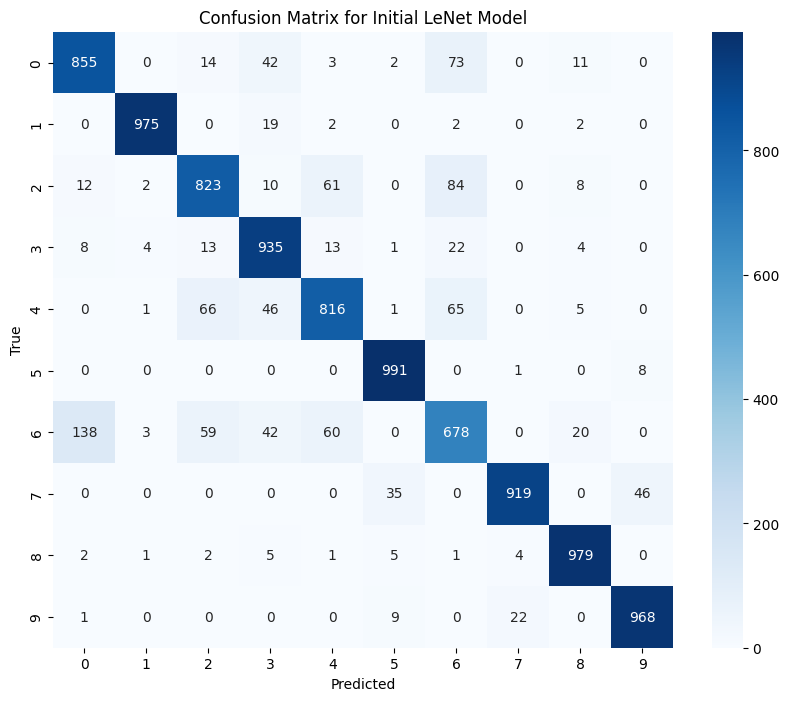

In [ ]:
# Initial LeNet model with Average Pooling
model_initial = Sequential()
model_initial.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_initial.add(AveragePooling2D(pool_size=(2, 2), strides=2))
model_initial.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_initial.add(AveragePooling2D(pool_size=(2, 2), strides=2))
model_initial.add(Flatten())
model_initial.add(Dense(120, activation='relu'))
model_initial.add(Dense(84, activation='relu'))
model_initial.add(Dense(10, activation='softmax'))
model_initial.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_initial = model_initial.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_initial, x_test, y_test)
results.append(('Initial LeNet', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Initial LeNet Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


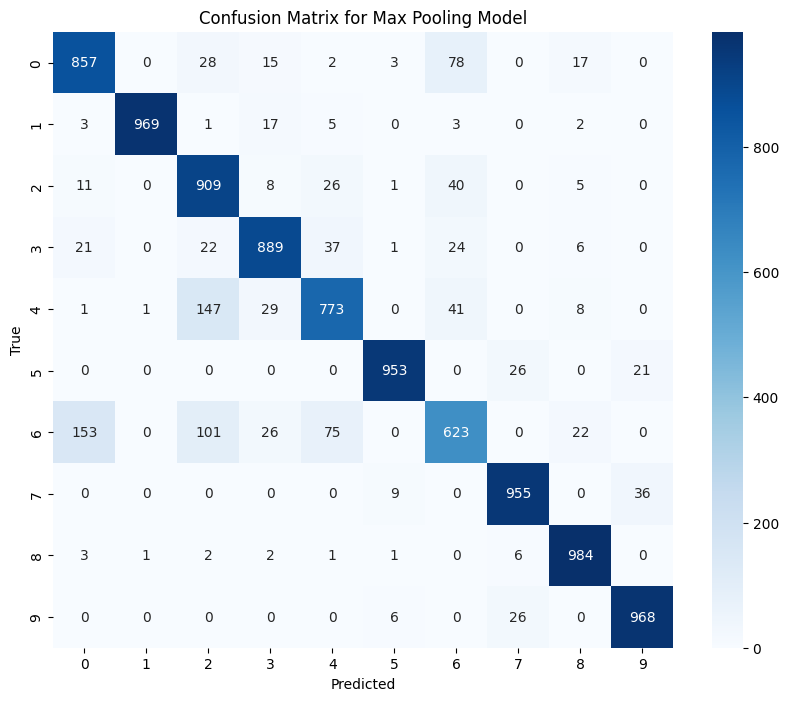

In [ ]:
# 1. Replace average pooling with maximum pooling
model_max_pooling = create_lenet_model(MaxPooling2D)
model_max_pooling.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_max_pooling = model_max_pooling.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_max_pooling, x_test, y_test)
results.append(('Max Pooling', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Max Pooling Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


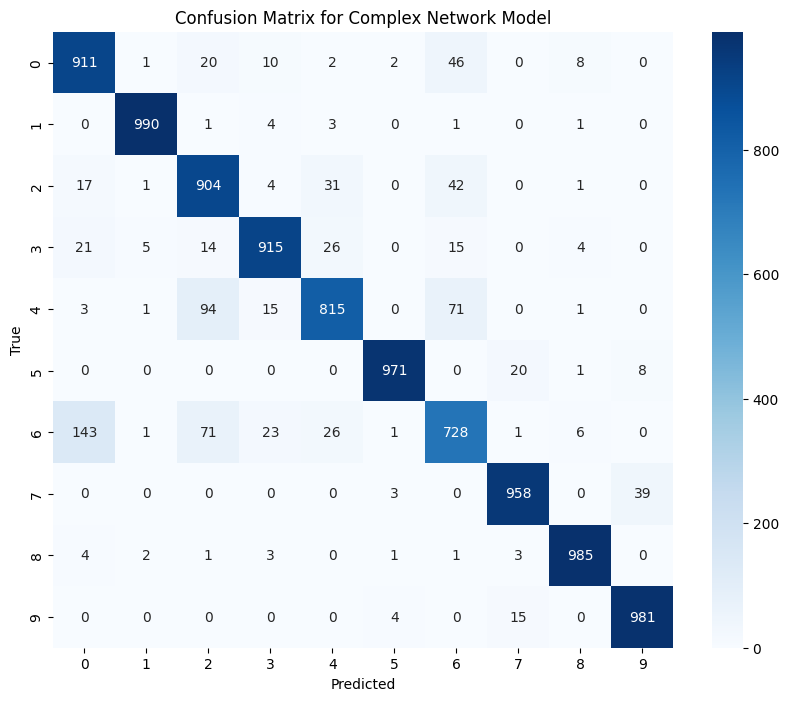

In [ ]:
# 2. Build a more complex network based on LeNet
model_complex = Sequential()
model_complex.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_complex.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_complex.add(Flatten())
model_complex.add(Dense(256, activation='relu'))
model_complex.add(Dense(128, activation='relu'))
model_complex.add(Dense(10, activation='softmax'))
model_complex.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_complex = model_complex.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_complex, x_test, y_test)
results.append(('Complex Network', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Complex Network Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


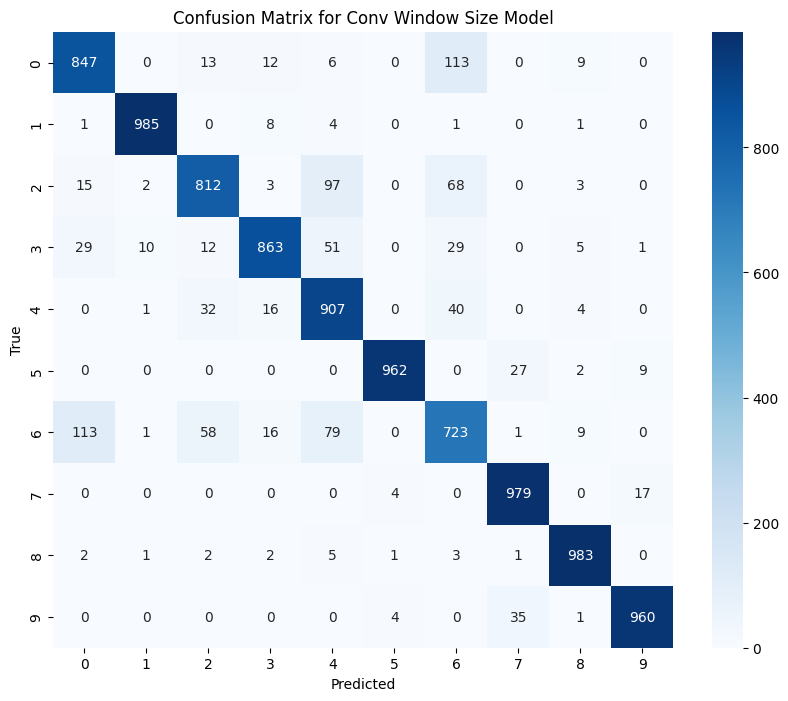

In [ ]:
# 3. Adjust the convolution window size
model_conv_window = Sequential()
model_conv_window.add(Conv2D(6, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_conv_window.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_conv_window.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_conv_window.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_conv_window.add(Flatten())
model_conv_window.add(Dense(120, activation='relu'))
model_conv_window.add(Dense(84, activation='relu'))
model_conv_window.add(Dense(10, activation='softmax'))
model_conv_window.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_conv_window = model_conv_window.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_conv_window, x_test, y_test)
results.append(('Conv Window Size', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Conv Window Size Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


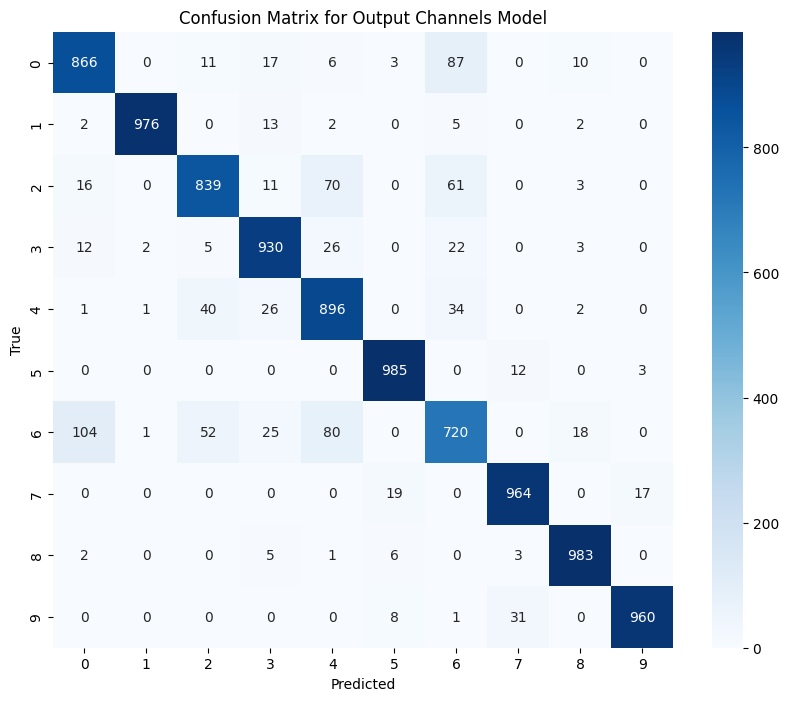

In [ ]:
# 4. Adjust the number of output channels
model_output_channels = Sequential()
model_output_channels.add(Conv2D(12, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_output_channels.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_output_channels.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model_output_channels.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_output_channels.add(Flatten())
model_output_channels.add(Dense(120, activation='relu'))
model_output_channels.add(Dense(84, activation='relu'))
model_output_channels.add(Dense(10, activation='softmax'))
model_output_channels.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_output_channels = model_output_channels.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_output_channels, x_test, y_test)
results.append(('Output Channels', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Output Channels Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


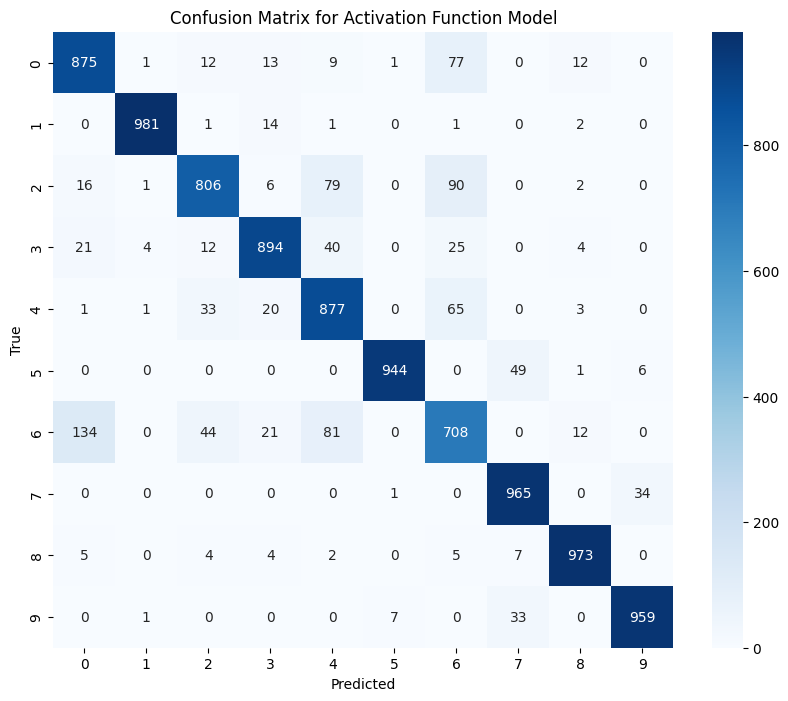

In [ ]:
# 5. Adjust the activation function
model_activation_function = Sequential()
model_activation_function.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
model_activation_function.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_activation_function.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_activation_function.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_activation_function.add(Flatten())
model_activation_function.add(Dense(120, activation='tanh'))
model_activation_function.add(Dense(84, activation='tanh'))
model_activation_function.add(Dense(10, activation='softmax'))
model_activation_function.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_activation_function = model_activation_function.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_activation_function, x_test, y_test)
results.append(('Activation Function', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Activation Function Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


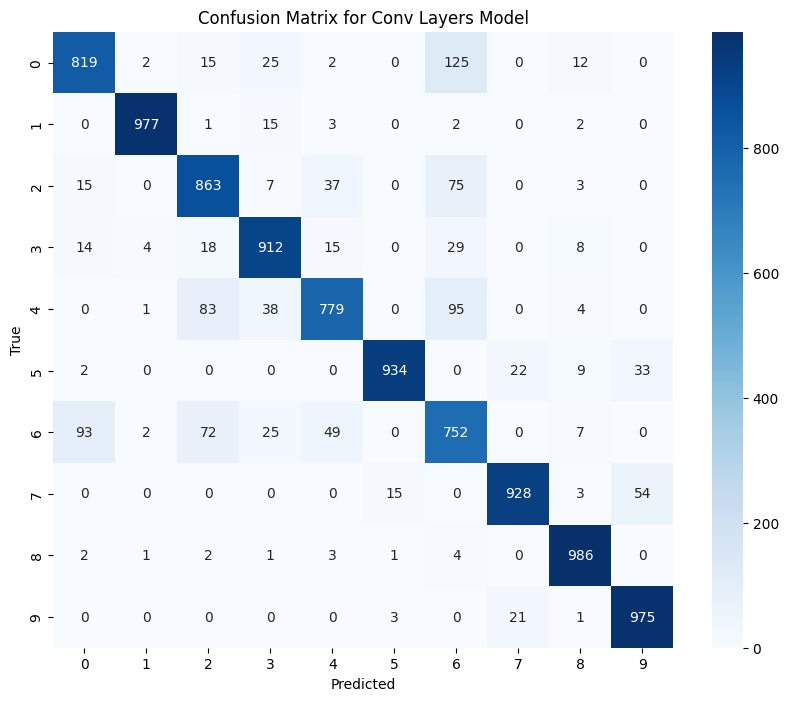

In [ ]:
# 6. Adjust the number of convolution layers
model_conv_layers = Sequential()
model_conv_layers.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_conv_layers.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_conv_layers.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_conv_layers.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_conv_layers.add(Flatten())
model_conv_layers.add(Dense(120, activation='relu'))
model_conv_layers.add(Dense(84, activation='relu'))
model_conv_layers.add(Dense(10, activation='softmax'))
model_conv_layers.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_conv_layers = model_conv_layers.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_conv_layers, x_test, y_test)
results.append(('Conv Layers', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Conv Layers Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


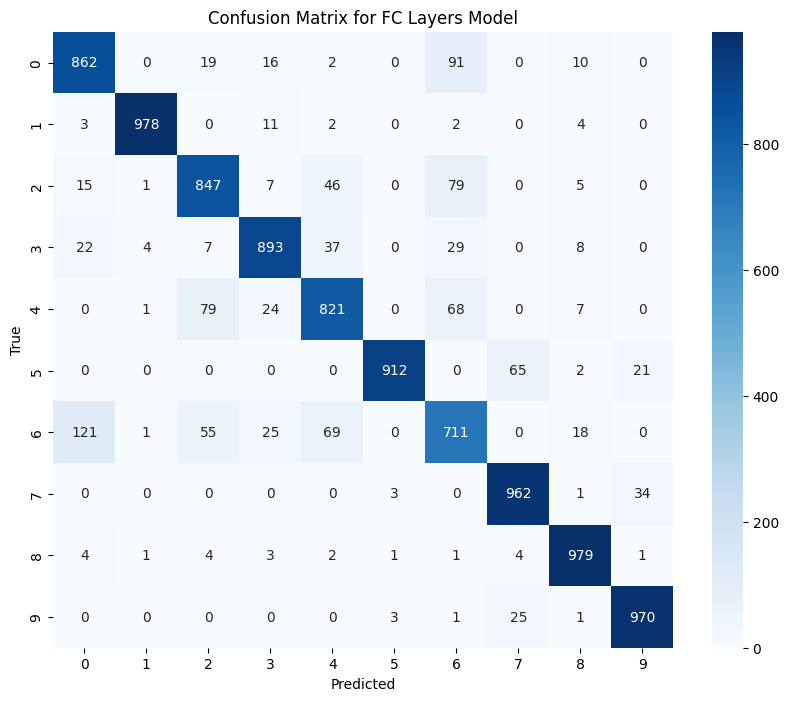

In [ ]:
# 7. Adjust the number of fully connected layers
model_fc_layers = Sequential()
model_fc_layers.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_fc_layers.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_fc_layers.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_fc_layers.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_fc_layers.add(Flatten())
model_fc_layers.add(Dense(120, activation='relu'))
model_fc_layers.add(Dense(84, activation='relu'))
model_fc_layers.add(Dense(64, activation='relu'))
model_fc_layers.add(Dense(10, activation='softmax'))
model_fc_layers.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_fc_layers = model_fc_layers.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_fc_layers, x_test, y_test)
results.append(('FC Layers', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for FC Layers Model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


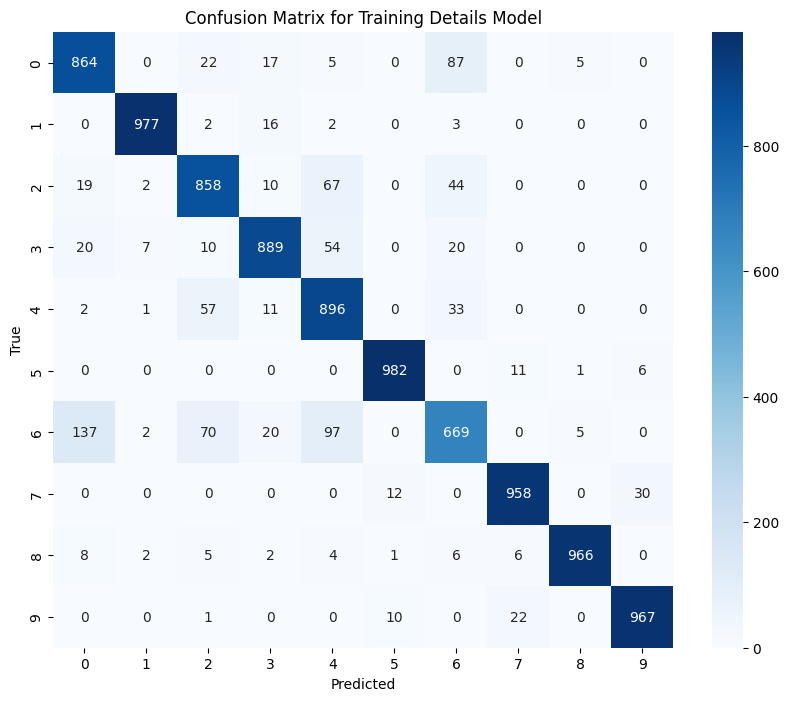

In [ ]:
# 8. Adjust learning rates and other training details
model_training_details = Sequential()
model_training_details.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_training_details.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_training_details.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_training_details.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_training_details.add(Flatten())
model_training_details.add(Dense(120, activation='relu'))
model_training_details.add(Dense(84, activation='relu'))
model_training_details.add(Dense(10, activation='softmax'))
model_training_details.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_training_details = model_training_details.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
accuracy, precision, recall, f1_score, y_true, y_pred_classes = evaluate_model(model_training_details, x_test, y_test)
results.append(('Training Details', accuracy, precision, recall, f1_score))
plot_confusion_matrix(y_true, y_pred_classes, 'Confusion Matrix for Training Details Model')

## Evaluation

In [ ]:
# Create a DataFrame to display the results
df_results = pd.DataFrame(results, columns=['Model Modification', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(df_results)

    Model Modification  Accuracy  Precision  Recall  F1-Score
0        Initial LeNet    0.8939   0.892932  0.8939  0.892898
1          Max Pooling    0.8880   0.888709  0.8880  0.886531
2      Complex Network    0.9158   0.916544  0.9158  0.915302
3     Conv Window Size    0.9021   0.903620  0.9021  0.902096
4      Output Channels    0.9119   0.911546  0.9119  0.911370
5  Activation Function    0.8982   0.899205  0.8982  0.898156
6          Conv Layers    0.8925   0.894559  0.8925  0.892795
7            FC Layers    0.8935   0.893849  0.8935  0.893343
8     Training Details    0.9026   0.903044  0.9026  0.902024


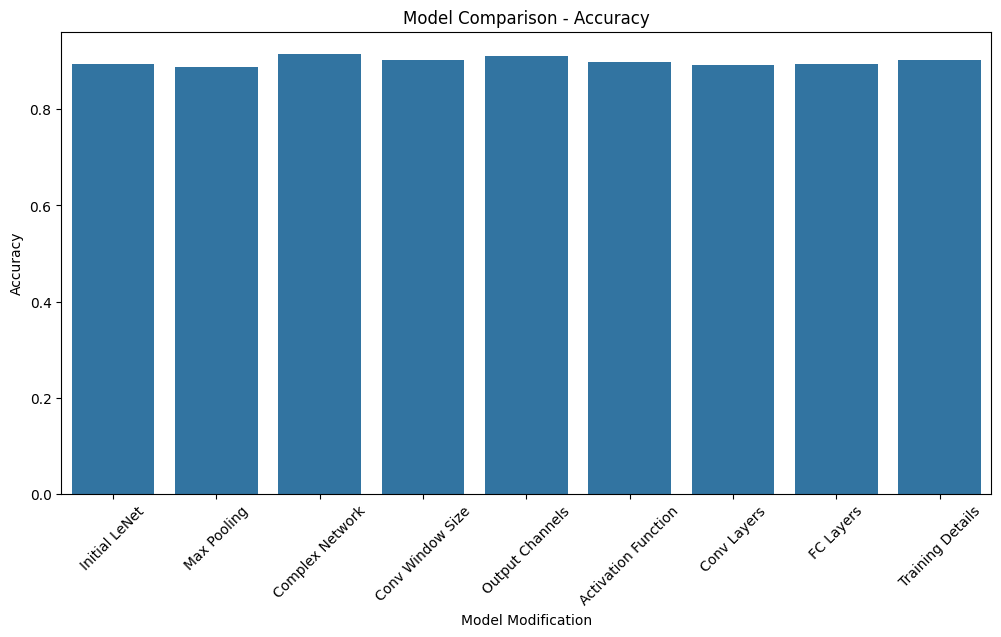

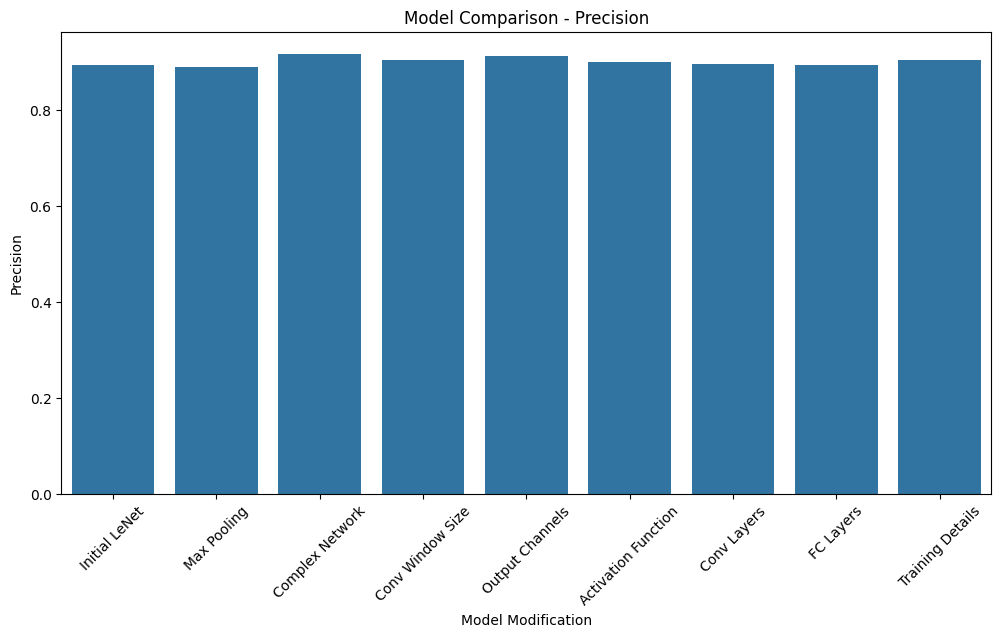

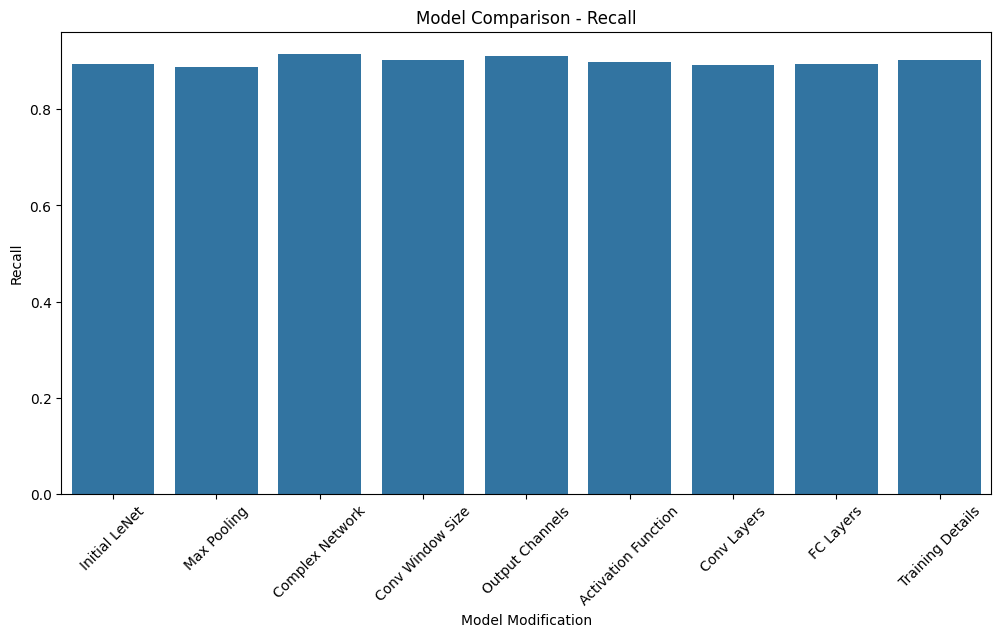

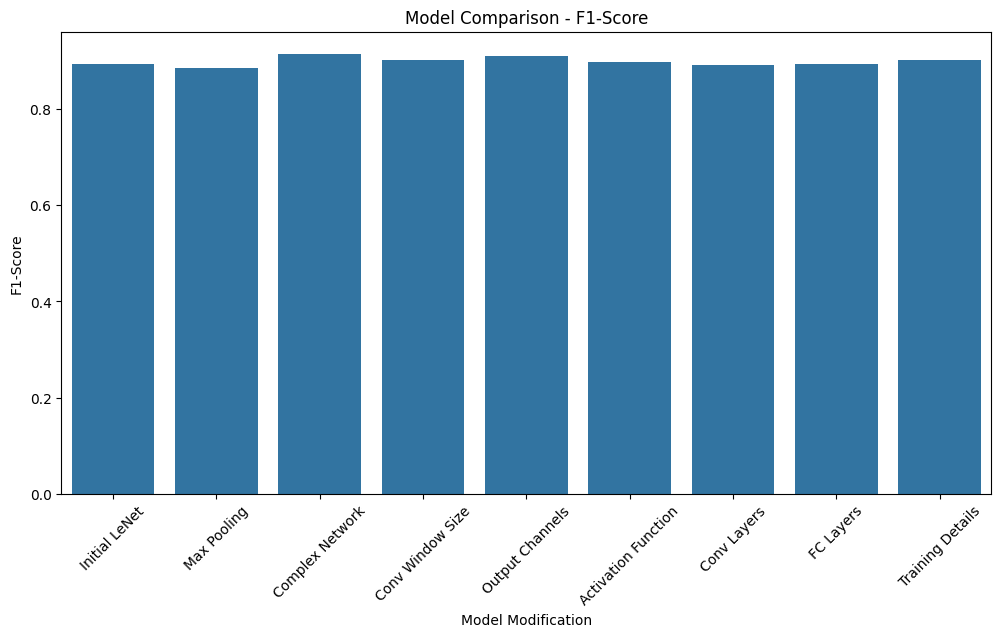

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model Modification', y='Accuracy', data=df_results)
plt.xticks(rotation=45)
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model Modification', y='Precision', data=df_results)
plt.xticks(rotation=45)
plt.title('Model Comparison - Precision')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model Modification', y='Recall', data=df_results)
plt.xticks(rotation=45)
plt.title('Model Comparison - Recall')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model Modification', y='F1-Score', data=df_results)
plt.xticks(rotation=45)
plt.title('Model Comparison - F1-Score')
plt.show()

## Part 2: Network in Network (NiN)

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
!pip install keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist # Import the fashion_mnist dataset from Keras

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10) # Use tf.keras.utils.to_categorical
y_test = tf.keras.utils.to_categorical(y_test, 10)   # Use tf.keras.utils.to_categorical

In [ ]:
# Define the NiN block
def nin_block(num_channels, kernel_size, strides, padding):
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(num_channels, kernel_size, strides=strides, padding=padding, activation='relu'),
        tf.keras.layers.Conv2D(num_channels, kernel_size=1, activation='relu'),
        tf.keras.layers.Conv2D(num_channels, kernel_size=1, activation='relu')
    ])

In [ ]:
# Define the network
def net():
    return tf.keras.models.Sequential([
        nin_block(96, kernel_size=11, strides=4, padding='valid'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        nin_block(256, kernel_size=5, strides=1, padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        nin_block(384, kernel_size=3, strides=1, padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Dropout(0.5),
        # There are 10 label classes
        nin_block(10, kernel_size=3, strides=1, padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Reshape((1, 1, 10)),
        # Transform the four-dimensional output into two-dimensional output
        # with a shape of (batch size, 10)
        tf.keras.layers.Flatten(),
    ])

In [ ]:
# Example usage
X = tf.random.uniform((1, 224, 224, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 (1, 54, 54, 96)
MaxPooling2D output shape:	 (1, 26, 26, 96)
Sequential output shape:	 (1, 26, 26, 256)
MaxPooling2D output shape:	 (1, 12, 12, 256)
Sequential output shape:	 (1, 12, 12, 384)
MaxPooling2D output shape:	 (1, 5, 5, 384)
Dropout output shape:	 (1, 5, 5, 384)
Sequential output shape:	 (1, 5, 5, 10)
GlobalAveragePooling2D output shape:	 (1, 10)
Reshape output shape:	 (1, 1, 1, 10)
Flatten output shape:	 (1, 10)


loss 1.001, train acc 0.645, test acc 0.643
1092.8 examples/sec on /GPU:0


<Sequential name=sequential_18, built=True>

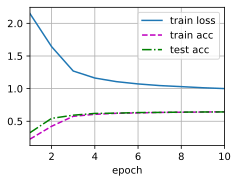

In [ ]:
# Training parameters
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

# Train the model
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Tune Hyperparameters

In [ ]:
# Analyze the NiN block by removing one 1x1 convolutional layer
def nin_block_modified(num_channels, kernel_size, strides, padding):
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(num_channels, kernel_size, strides=strides, padding=padding, activation='relu'),
        tf.keras.layers.Conv2D(num_channels, kernel_size=1, activation='relu')
    ])

In [ ]:
# Redefine the network with the modified NiN block
def net_modified():
    return tf.keras.models.Sequential([
        nin_block_modified(96, kernel_size=11, strides=4, padding='valid'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        nin_block_modified(256, kernel_size=5, strides=1, padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        nin_block_modified(384, kernel_size=3, strides=1, padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Dropout(0.5),
        # There are 10 label classes
        nin_block_modified(10, kernel_size=3, strides=1, padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Reshape((1, 1, 10)),
        tf.keras.layers.Flatten(),
    ])

loss 1.322, train acc 0.496, test acc 0.533
1253.4 examples/sec on /GPU:0


<Sequential name=sequential_23, built=True>

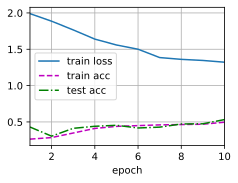

In [ ]:
# Train the modified model
d2l.train_ch6(net_modified, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
import numpy as np # Import numpy and alias it as np

# Calculate resource usage for NiN
def calculate_parameters(layer):
    if isinstance(layer, tf.keras.layers.Conv2D):
        kernel_size = layer.kernel_size
        input_channels = layer.input_shape[-1]
        output_channels = layer.filters
        return (kernel_size[0] * kernel_size[1] * input_channels + 1) * output_channels
    return 0

def calculate_flops(layer, input_shape):
    if isinstance(layer, tf.keras.layers.Conv2D):
        kernel_size = layer.kernel_size
        input_channels = layer.input_shape[-1]
        output_channels = layer.filters
        output_height, output_width = input_shape[1], input_shape[2]
        return 2 * (kernel_size[0] * kernel_size[1] * input_channels * output_height * output_width * output_channels)
    return 0

model = net()
total_params = np.sum([calculate_parameters(layer) for layer in model.layers]) # Now np is defined and can be used
input_shape = (1, 224, 224, 3)  # Example input shape
total_flops = np.sum([calculate_flops(layer, input_shape) for layer in model.layers]) # Now np is defined and can be used

print(f"Total Parameters: {total_params}")
print(f"Total FLOPs: {total_flops}")

Total Parameters: 0
Total FLOPs: 0


In [ ]:
# Memory usage during training and prediction
def calculate_memory_usage(layer, batch_size):
    if isinstance(layer, tf.keras.layers.Conv2D):
        output_shape = layer.output_shape
        return np.prod(output_shape) * batch_size * 4  # 4 bytes per float32
    return 0

total_memory_training = np.sum([calculate_memory_usage(layer, batch_size) for layer in model.layers])
total_memory_prediction = np.sum([calculate_memory_usage(layer, 1) for layer in model.layers])

print(f"Total Memory Usage During Training: {total_memory_training / (1024 ** 2)} MB")
print(f"Total Memory Usage During Prediction: {total_memory_prediction / (1024 ** 2)} MB")

Total Memory Usage During Training: 0.0 MB
Total Memory Usage During Prediction: 0.0 MB


## GoogleNet

In [ ]:
class Inception(tf.keras.Model):
    def __init__(self, c1, c2, c3, c4):
        super().__init__()
        self.p1_1 = tf.keras.layers.Conv2D(c1, 1, activation='relu')
        self.p2_1 = tf.keras.layers.Conv2D(c2[0], 1, activation='relu')
        self.p2_2 = tf.keras.layers.Conv2D(c2[1], 3, padding='same', activation='relu')
        self.p3_1 = tf.keras.layers.Conv2D(c3[0], 1, activation='relu')
        self.p3_2 = tf.keras.layers.Conv2D(c3[1], 5, padding='same', activation='relu')
        self.p4_1 = tf.keras.layers.MaxPool2D(3, 1, padding='same')
        self.p4_2 = tf.keras.layers.Conv2D(c4, 1, activation='relu')

    def call(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        return tf.keras.layers.Concatenate()([p1, p2, p3, p4])

In [ ]:
def b1():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
    ])

def b2():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, 1, activation='relu'),
        tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
    ])

def b3():
    return tf.keras.models.Sequential([
        Inception(64, (96, 128), (16, 32), 32),
        Inception(128, (128, 192), (32, 96), 64),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
    ])

def b4():
    return tf.keras.models.Sequential([
        Inception(192, (96, 208), (16, 48), 64),
        Inception(160, (112, 224), (24, 64), 64),
        Inception(128, (128, 256), (24, 64), 64),
        Inception(112, (144, 288), (32, 64), 64),
        Inception(256, (160, 320), (32, 128), 128),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
    ])

def b5():
    return tf.keras.models.Sequential([
        Inception(256, (160, 320), (32, 128), 128),
        Inception(384, (192, 384), (48, 128), 128),
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Flatten()
    ])

def net():
    return tf.keras.models.Sequential([
        b1(), b2(), b3(), b4(), b5(),
        tf.keras.layers.Dense(10)
    ])

In [ ]:
# Example usage
X = tf.random.uniform(shape=(1, 96, 96, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [ ]:
# Training parameters
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())